In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle

In [ ]:
#Execute the following command to import the dataset:
dataset = pd.read_csv('germandata.txt',header = None,delim_whitespace = True)

In [ ]:
#viewing the first 5 elements in the dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
#assigning columns names to data varible
dataset.columns = ["chek_acc","duration","credit_hist","purpose","Credit_amt","saving_amt","Present_emplymnt","instalmt_rate","gender_status","guarant","present_residence","property","age","installment","Housing","existing_cards","job","no_people","telephn","for_work","status"]

In [ ]:
dataset.head()

,chek_acc,duration,credit_hist,purpose,Credit_amt,saving_amt,Present_emplymnt,instalmt_rate,gender_status,guarant,present_residence,property,age,installment,Housing,existing_cards,job,no_people,telephn,for_work,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
dataset.describe()

,duration,Credit_amt,instalmt_rate,present_residence,age,existing_cards,no_people,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
#information about data variable types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   chek_acc           1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_hist        1000 non-null   object
 3   purpose            1000 non-null   object
 4   Credit_amt         1000 non-null   int64 
 5   saving_amt         1000 non-null   object
 6   Present_emplymnt   1000 non-null   object
 7   instalmt_rate      1000 non-null   int64 
 8   gender_status      1000 non-null   object
 9   guarant            1000 non-null   object
 10  present_residence  1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  installment        1000 non-null   object
 14  Housing            1000 non-null   object
 15  existing_cards     1000 non-null   int64 
 16  job                1000 non-null   object
 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

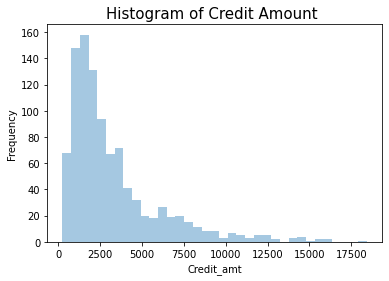

In [ ]:
#created histogram for credit amount
sn.distplot( dataset.Credit_amt, kde = False )
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

In [ ]:
data_crosstab = pd.crosstab(dataset['age'], 
							dataset['status'],
                margins = False) 
print(data_crosstab) 

status   1   2
age           
19       1   1
20       9   5
21       9   5
22      16  11
23      28  20
24      25  19
25      22  19
26      36  14
27      38  13
28      28  15
29      22  15
30      29  11
31      27  11
32      25   9
33      20  13
34      21  11
35      34   6
36      33   6
37      21   8
38      20   4
39      15   6
40      19   6
41      13   4
42      14   8
43      12   5
44      12   5
45      12   3
46      14   4
47      12   5
48       9   3
49      13   1
50       9   3
51       7   1
52       8   1
53       2   5
54       8   2
55       5   3
56       3   0
57       6   3
58       3   2
59       2   1
60       3   3
61       4   3
62       2   0
63       7   1
64       5   0
65       4   1
66       3   2
67       3   0
68       1   2
70       1   0
74       3   1
75       2   0


status       1     2
purpose             
A40      145.0  89.0
A41       86.0  17.0
A410       7.0   5.0
A42      123.0  58.0
A43      218.0  62.0
A44        8.0   4.0
A45       14.0   8.0
A46       28.0  22.0
A48        8.0   1.0
A49       63.0  34.0


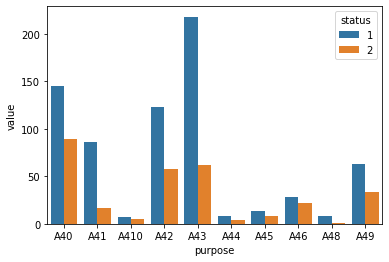

In [ ]:
import seaborn as sns
data_crosstab = pd.crosstab(dataset['purpose'], 
							dataset['status'],
                margins = False, normalize=True)*1000
print(data_crosstab)
stacked = data_crosstab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.purpose, y=stacked.value, hue=stacked.status)
#ax = sns.barplot(x="Purpose", y="Customers", hue="Creditability", data=data)

status                 1      2
present_residence              
1                   94.0   36.0
2                  211.0   97.0
3                  106.0   43.0
4                  289.0  124.0


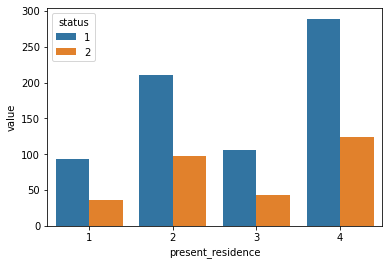

In [ ]:
data_crosstab = pd.crosstab(dataset['present_residence'], 
							dataset['status'],
                margins = False, normalize=True)*1000
print(data_crosstab)
stacked = data_crosstab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.present_residence, y=stacked.value, hue=stacked.status)
#ax = sns.barplot(x="Purpose", y="Customers", hue="Creditability", data=data)

In [ ]:
#created pairplot to view data  

sn.pairplot(dataset)

In [ ]:
pip install scorecardpy

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp36-none-any.whl size=57826 sha256=407ddc6668220ba0d8e51fb26497c1cd60d329c10db9cad5b5937e66652bc920
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [ ]:

X = list(dataset.columns)
X.remove("status")
#to make output value  binary represenations 0-good 1-bad
Y = dataset.status-1
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
#creating dummies for X (catagorical variable present in X)
X= pd.get_dummies(dataset[X],drop_first =True)
X

,duration,Credit_amt,instalmt_rate,present_residence,age,existing_cards,no_people,chek_acc_A12,chek_acc_A13,chek_acc_A14,credit_hist_A31,credit_hist_A32,credit_hist_A33,credit_hist_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,saving_amt_A62,saving_amt_A63,saving_amt_A64,saving_amt_A65,Present_emplymnt_A72,Present_emplymnt_A73,Present_emplymnt_A74,Present_emplymnt_A75,gender_status_A92,gender_status_A93,gender_status_A94,guarant_A102,guarant_A103,property_A122,property_A123,property_A124,installment_A142,installment_A143,Housing_A152,Housing_A153,job_A172,job_A173,job_A174,telephn_A192,for_work_A202
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
997,12,804,4,4,38,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
998,45,1845,4,4,23,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
#spliting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.42


In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
params['eval_metric'] = "mae"

In [ ]:
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=30
)

[08:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.451253
Will train until Test-mae hasn't improved in 30 rounds.
[1]	Test-mae:0.412744
[2]	Test-mae:0.388365
[3]	Test-mae:0.367481
[4]	Test-mae:0.357645
[5]	Test-mae:0.352008
[6]	Test-mae:0.34712
[7]	Test-mae:0.342706
[8]	Test-mae:0.335531
[9]	Test-mae:0.334872
[10]	Test-mae:0.334749
[11]	Test-mae:0.336374
[12]	Test-mae:0.338442
[13]	Test-mae:0.337116
[14]	Test-mae:0.338295
[15]	Test-mae:0.33751
[16]	Test-mae:0.337894
[17]	Test-mae:0.336185
[18]	Test-mae:0.335934
[19]	Test-mae:0.333662
[20]	Test-mae:0.333509
[21]	Test-mae:0.334318
[22]	Test-mae:0.333554
[23]	Test-mae:0.335202
[24]	Test-mae:0.335952
[25]	Test-mae:0.337684
[26]	Test-mae:0.336873
[27]	Test-mae:0.336965
[28]	Test-mae:0.337936
[29]	Test-mae:0.337555
[30]	Test-mae:0.33816
[31]	Test-mae:0.337716
[32]	Test-mae:0.338007
[33]	Test-mae:0.338948
[34]	Test-mae:0.339167
[35]	Test-mae:0.339354
[3

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[08:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.427875,0.004671,0.456537,0.005057
1,0.365352,0.005214,0.425524,0.005061
2,0.319291,0.006852,0.400681,0.004544
3,0.284375,0.006051,0.383324,0.003852
4,0.252980,0.006359,0.371059,0.005661
5,0.229947,0.007839,0.362015,0.005805
6,0.211837,0.009037,0.354674,0.006224
7,0.195707,0.004462,0.350632,0.007577
8,0.184034,0.004557,0.345663,0.008127
9,0.174898,0.006703,0.344036,0.007543


In [ ]:
cv_results['test-mae-mean'].min()


0.3423158

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[08:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.3390218 for 9 rounds
CV with max_depth=9, min_child_weight=6
[08:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08

In [ ]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.332771 for 19 rounds
CV with subsample=1.0, colsample=0.9
[08:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:46

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [ ]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],
    early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[08:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.332771 for 19 rounds

CV with eta=0.2
[08:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:11] WARNING: /workspace/src/objective/regre

In [ ]:
params['eta'] = 0.5

In [ ]:
params
{'colsample_bytree': 1.0,
 'eta': 0.5,
 'eval_metric': 'mae',
 'max_depth': 9,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 1.0}

{'colsample_bytree': 1.0,
 'eta': 0.5,
 'eval_metric': 'mae',
 'max_depth': 9,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[08:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.499224
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.498451
[2]	Test-mae:0.497687
[3]	Test-mae:0.496914
[4]	Test-mae:0.496141
[5]	Test-mae:0.495355
[6]	Test-mae:0.4946
[7]	Test-mae:0.493828
[8]	Test-mae:0.493097
[9]	Test-mae:0.49231
[10]	Test-mae:0.491606
[11]	Test-mae:0.490837
[12]	Test-mae:0.490111
[13]	Test-mae:0.489459
[14]	Test-mae:0.488831
[15]	Test-mae:0.488124
[16]	Test-mae:0.487502
[17]	Test-mae:0.486854
[18]	Test-mae:0.486157
[19]	Test-mae:0.485553
[20]	Test-mae:0.484902
[21]	Test-mae:0.484257
[22]	Test-mae:0.483584
[23]	Test-mae:0.482908
[24]	Test-mae:0.482246
[25]	Test-mae:0.481657
[26]	Test-mae:0.480984
[27]	Test-mae:0.480371
[28]	Test-mae:0.479639
[29]	Test-mae:0.47902
[30]	Test-mae:0.478311
[31]	Test-mae:0.477663
[32]	Test-mae:0.477022
[33]	Test-mae:0.476398
[34]	Test-mae:0.475685
[35]	Test-mae:0.475064
[36

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[08:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.499224
[1]	Test-mae:0.498451
[2]	Test-mae:0.497687
[3]	Test-mae:0.496914
[4]	Test-mae:0.496141
[5]	Test-mae:0.495355
[6]	Test-mae:0.4946
[7]	Test-mae:0.493828
[8]	Test-mae:0.493097
[9]	Test-mae:0.49231
[10]	Test-mae:0.491606
[11]	Test-mae:0.490837
[12]	Test-mae:0.490111
[13]	Test-mae:0.489459
[14]	Test-mae:0.488831
[15]	Test-mae:0.488124
[16]	Test-mae:0.487502
[17]	Test-mae:0.486854
[18]	Test-mae:0.486157
[19]	Test-mae:0.485553
[20]	Test-mae:0.484902
[21]	Test-mae:0.484257
[22]	Test-mae:0.483584
[23]	Test-mae:0.482908
[24]	Test-mae:0.482246
[25]	Test-mae:0.481657
[26]	Test-mae:0.480984
[27]	Test-mae:0.480371
[28]	Test-mae:0.479639
[29]	Test-mae:0.47902
[30]	Test-mae:0.478311
[31]	Test-mae:0.477663
[32]	Test-mae:0.477022
[33]	Test-mae:0.476398
[34]	Test-mae:0.475685
[35]	Test-mae:0.475064
[36]	Test-mae:0.47443
[37]	Test-mae:0.473798
[38]	Test-mae:

In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.3206878085453839

In [ ]:
best_model.save_model("my_model.model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")

[08:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = loaded_model.predict(dtest)

In [ ]:
print(y_pred)

[ 0.7356761   0.03156021  0.04202524  0.18373781  0.40618056  0.23448572
  0.60506874 -0.01376444  0.08128396  0.6370958   0.49743816  0.4734256
  0.24544579  0.3097986   0.56934315  0.2596997   0.12634236 -0.09257394
  0.2577911   0.4399947   0.3911711   0.59022915  0.3713077   0.16828915
 -0.01526117  0.9305871   0.19090065  0.29249507  0.01576674  0.768205
  0.15788937  0.54843295  0.42697215  0.4135229   0.24663281  0.78386706
  0.18138877  0.03487769  0.35611695  0.54746145  0.23677889  0.31932735
  0.23733678  0.1717948   0.23943794  0.45269638  0.5173765   0.42031816
  0.35208935  0.07273105  0.09548208  0.56659937  0.3928807   0.27398086
  0.48912382  0.37037712  0.49658948  0.07175872  0.00557053  0.20509279
  0.8415397  -0.00255525  0.67150044  0.43273354  0.06808245  0.13784295
  0.0750789   0.16517493  0.43825752  0.1587475   0.29902327  0.28402013
  0.44744852  0.40797067  0.5249525   0.51734406  0.26947892  0.4053134
  0.4888064  -0.03230846  0.41466585  0.2495664   0.148

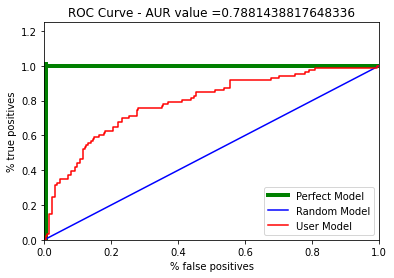

In [ ]:
roccurve(y_values=y_test, y_preds_proba=y_pred)

In [ ]:
#building the random forest classifier 
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 750, criterion = 'entropy',random_state=0,min_samples_split=5,max_depth=15)

In [ ]:
from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier( )


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
max_depth=hp.quniform("max_depth", 3, 18, 1),
gamma=hp.uniform ('gamma', 1,9),
reg_alpha = hp.quniform('reg_alpha', 40,180,1),
reg_lambda = hp.uniform('reg_lambda', 0,1),
colsample_bytree = hp.uniform('colsample_bytree', 0.5,1),
min_child_weight=hp.quniform('min_child_weight', 0, 10, 1),
n_estimators = 180,
seed=0

clf = xgb.XGBClassifier(n_estimators =n_estimators, max_depth = max_depth, gamma = gamma,
                    reg_alpha = reg_alpha,min_child_weight=min_child_weight,
                    colsample_bytree=colsample_bytree)

acc = cross_val_score(clf, X_test, y_test,scoring="accuracy").mean()
print(acc)

nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'tuple' object cannot be interpreted as an integer

  FitFailedWarning)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }


In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.48)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

'''def hyperparameter_tuning(params):
    clf = xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    acc = cross_val_score(clf, X_test, y_test,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}'''

'def hyperparameter_tuning(params):\n    clf = xgb.XGBClassifier(\n                    n_estimators =space[\'n_estimators\'], max_depth = int(space[\'max_depth\']), gamma = space[\'gamma\'],\n                    reg_alpha = int(space[\'reg_alpha\']),min_child_weight=int(space[\'min_child_weight\']),\n                    colsample_bytree=int(space[\'colsample_bytree\']))\n    acc = cross_val_score(clf, X_test, y_test,scoring="accuracy").mean()\n    return {"loss": -acc, "status": STATUS_OK}'

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 1000,
                        trials = trials)

SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.7133333333333334
SCORE:
0.713

In [ ]:
import statsmodels.api as sm
exog, endog = sm.add_constant(X_train), y_train
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


In [ ]:
import statsmodels.api as sm
classifier = sm.GLM(X_train, y_train, family=sm.families.Gamma())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import xgboost as xgb
from xgboost import XGBClassifier
#print('XGBoost v',xgb.__version__)

# fit, train and cross validate Decision Tree with training and test data 
def xgbclf(params, X_train, y_train,X_test, y_test):
  
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    model = XGBClassifier(**params).\
      fit(X_train, y_train, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
        
    #print(model.best_ntree_limit)

    model.set_params(**{'n_estimators': model.best_ntree_limit})
    model.fit(X_train, y_train)
    #print(model,'\n')
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit) #model.best_iteration
    #print(y_pred)
   
    # Get Cross Validation and Confusion matrix
    #get_eval(model, X_train, y_train)
    #get_eval2(model, X_train, y_train,X_test, y_test)
    
    # Create and print confusion matrix    
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    
    #y_pred = model.predict(X_test)
    print (classification_report(y_test,y_pred) )
    print ('\n')
    print ("Model Final Generalization Accuracy: %.6f" %accuracy_score(y_test,y_pred) )

    # Predict probabilities target variables y for test data
    y_pred_proba = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)[:,1] #model.best_iteration
    get_roc (y_test,y_pred_proba)
    return model

def plot_featureImportance(model, keys):
  importances = model.feature_importances_

  importance_frame = pd.DataFrame({'Importance': list(importances), 'Feature': list(keys)})
  importance_frame.sort_values(by = 'Importance', inplace = True)
  importance_frame.tail(10).plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')
  

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit, train and cross validate Decision Tree with training and test data 
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_train, y_train)
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
#predictive  values for test set 
y_pred = best_model.predict(dtest)
#pred = best_model.predict_proba(dtest)
print(y_pred)
#print(pred)

threshold = 0.38

predicted_proba = classifier.predict_proba(dtest)
predicted = (predicted_proba [:,1] >= threshold)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)


'''threshold = 0.4

predicted = y_pred
predicted [:,0] = (predicted [:,0] < threshold).astype('int')
predicted [:,1] = (predicted [:,1] >= threshold).astype('int')


accuracy = accuracy_score(y_test, predicted)
print(round(accuracy,4,)*100, "%")'''

'''for i in range(len(X)):
	print("X=%s, Predicted=%s" % (X[i], y_pred[i]))'''

'''# plot impact of brier for single forecasts
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [y_pred*0.01 for y_pred in range(0, 1)]
# evaluate predictions for a 1 true value
losses = [brier_score_loss([1], [x], pos_label=[1]) for x in yhat]
print(losses)
# plot inp
pyplot.plot(yhat, losses)
pyplot.show()




from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=48, random_state=1)
# fit final model
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
classifier.fit(X_train, y_train)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=200, centers=2, n_features=48, random_state=1)
# make a prediction
y_pred = classifier.predict(Xnew)
print(y_pred)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], y_pred[i]))'''


[ 0.73567575  0.03156004  0.04202472  0.18373777  0.40618077  0.23448572
  0.60506916 -0.01376458  0.08128341  0.6370956   0.49743804  0.47342497
  0.24544647  0.30979863  0.5693424   0.25969964  0.1263418  -0.09257389
  0.25779086  0.43999463  0.39117095  0.5902289   0.37130773  0.16828908
 -0.01526137  0.9305868   0.19090039  0.29249495  0.01576659  0.7682051
  0.15788952  0.54843265  0.42697242  0.41352323  0.24663267  0.78386664
  0.18138821  0.03487726  0.35611707  0.54746133  0.23677887  0.31932783
  0.23733665  0.1717946   0.2394378   0.45269632  0.51737666  0.42031795
  0.35208908  0.07273097  0.09548152  0.5665985   0.39288098  0.27398103
  0.4891238   0.3703776   0.49658892  0.07175798  0.00557048  0.2050928
  0.84153956 -0.00255534  0.67149985  0.43273348  0.06808221  0.13784277
  0.07507835  0.16517483  0.43825722  0.15874745  0.29902333  0.2840204
  0.44744822  0.40797082  0.52495265  0.5173442   0.2694788   0.40531328
  0.4888063  -0.03230863  0.4146662   0.24956632  0.14

TypeError: ignored

In [ ]:
#building ROC curve 
import matplotlib.pyplot as plt
from sklearn import metrics
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)

    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()

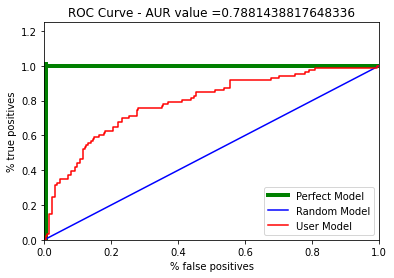

In [ ]:
roccurve(y_values=y_test, y_preds_proba=y_pred)

In [ ]:
#accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    